# Part1. Stock Market

## Question 5

In [8]:
if (!require('igraph')) install.packages('igraph')
library('igraph')
library('dplyr')

In [9]:
filefolder_name = 'finance_data/data/'
filelist = list.files(filefolder_name)

In [18]:
r_list = data.frame()
for (filename in filelist) {
    stock <- read.csv(paste(filefolder_name, filename, sep=""))
    Sys.setlocale('LC_TIME', 'english')
    stock <- filter(stock, weekdays(as.Date(stock$Date)) == "Monday")
    stock_list <- stock$Close
    r_list <- rbind(r_list, log(stock_list[-1]/stock_list[-length(stock_list)]))
}

In [22]:
print(length(r_list))
print(length(r_list[,1]))

[1] 142
[1] 505


In [23]:
w_list = data.frame()
for (i in 1:(length(filelist)-1)) {
    for (j in (i+1):length(filelist)) {
        r1 <- as.numeric(r_list[i,])
        r2 <- as.numeric(r_list[j,])
        rou <- (mean(r1*r2)-mean(r1)*mean(r2))/sqrt((mean(r1**2)-mean(r1)**2)*(mean(r2**2)-mean(r2)**2))
        w <- sqrt(2*(1-rou))
        
        w_list <- rbind(w_list, c(i,j,w))
    }
}

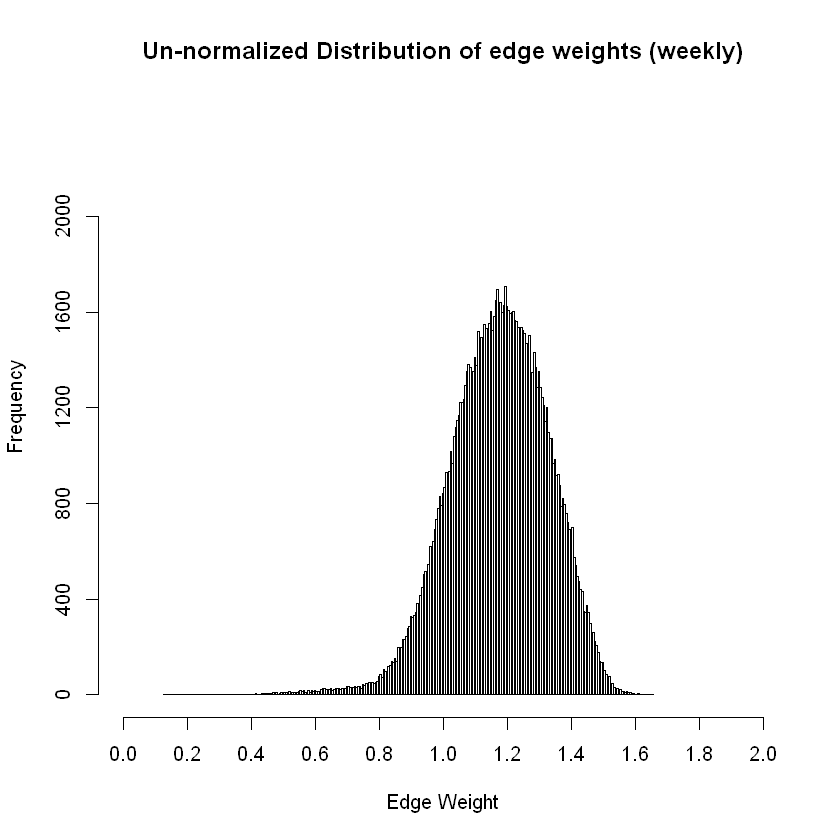

In [28]:
hist(w_list[,3], breaks = 300, 
                 xlim = c(0,2),
                 ylim = c(0,2400),
                 axes = FALSE,
                 xlab = "Edge Weight", 
                 ylab = "Frequency", 
                 main = "Un-normalized Distribution of edge weights (weekly)", 
                 freq = TRUE)
axis(side = 1, at = seq(0,2,0.2))
axis(side = 2, at = seq(0,2000,400))

In [29]:
graph <- graph_from_data_frame(w_list, directed = FALSE)
E(graph)$weight <- w_list[,3]

MST <- mst(graph)

stock_sec <- read.csv('finance_data/Name_sector.csv')
sector_list <- sort(unique(stock_sec$Sector))
V(MST)$sector <- stock_sec$Sector

In [30]:
colors <- c("brown1", "blueviolet", "chartreuse2", "cyan", "dodgerblue3", "deeppink", "yellow","tomato","gray70","darkorange", "firebrick")
for (i in 1:length(V(MST))) {
    V(MST)[i]$color = colors[as.numeric(V(MST)[i]$sector)]
}

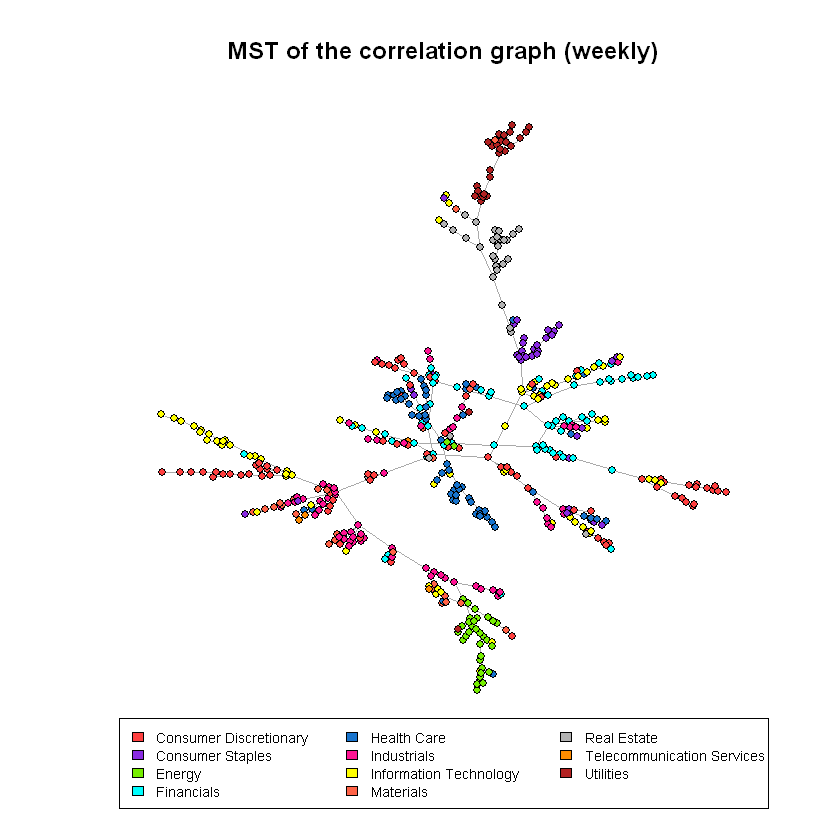

In [31]:
plot(MST, vertex.size = 3, vertex.label = NA, vertex.color = V(MST)$color, layout = layout.fruchterman.reingold)
par(xpd=TRUE)
legend(x=-1.15, y=-1.1, legend=unlist(sector_list), fill=unlist(colors), ncol=3, cex=0.7)
title("MST of the correlation graph (weekly)")

In [32]:
# case 1
alpha <- 0
for (i in 1:vcount(MST)) {
    alpha <- alpha + sum(V(MST)[neighbors(MST,i)]$sector == V(MST)[i]$sector)/length(neighbors(MST,i))
}
alpha <- alpha/vcount(MST)
print(alpha)

[1] 0.7201194


In [33]:
# case 2
alpha2 <- 0
for (i in 1:vcount(MST)) {
    alpha2 <- alpha2 + sum(V(MST)$sector==V(MST)[i]$sector)/vcount(MST)
}
alpha2 <- alpha2/vcount(MST)
print(alpha2)

[1] 0.1145652
